In [1]:
import geopandas
import contextily as ctx

## Basemap

In [11]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

## UK

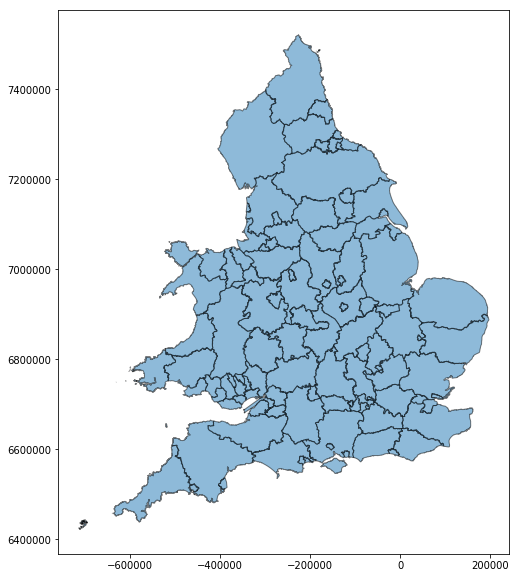

In [107]:
eacounties = geopandas.read_file('/s3/informatics-water-resilience-challence-data/mapping/counties/counties_NFFS-FFC.shp').to_crs(epsg=3857)
ax = eacounties.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

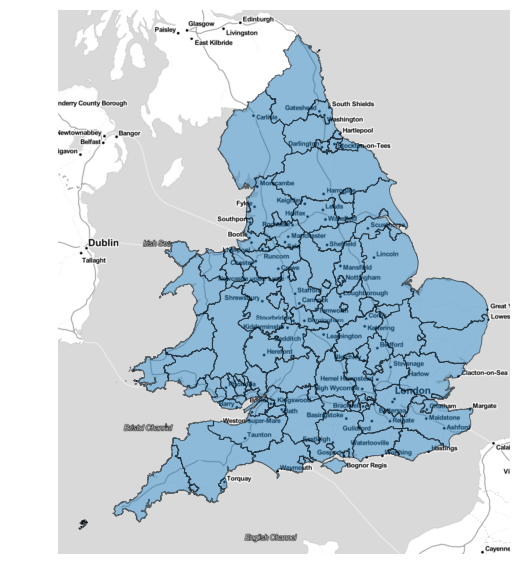

In [108]:
ax = eacounties.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=7, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

## Rivers

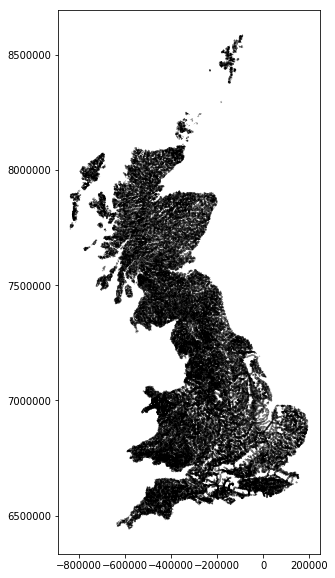

In [50]:
rivers = geopandas.read_file('/s3/informatics-water-resilience-challence-data/mapping/rivers/WatercourseLink.shp').to_crs(epsg=3857)
ax = rivers.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [109]:
devon = eacounties[ukdf['NAME'].str.contains('Devon')]
devon

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,geometry
27,Devon County,CTY,County,DEVON_COUNTY,12,1385,122079,23147,18,663617.259,6905.834,AA,CIVIL ADMINISTRATION AREA,(POLYGON ((-407146.8597684078 6486623.70781984...


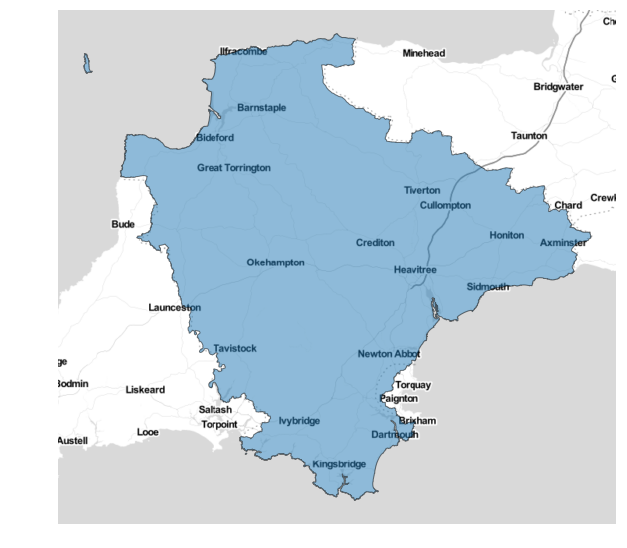

In [46]:
ax = devon.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
add_basemap(ax, zoom=9, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

In [75]:
devon_rivers = rivers[rivers['geometry'].intersects(devon.iloc[0]['geometry'])]
devon_rivers.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
147560,None,20BA8FD9-B192-43C3-97A0-14997FEB1C74,3CDAE404-D7B6-4CC6-BA02-D38ED7A72909,8C1F9D1E-3F57-4433-957E-39CE3066D33C,inlandRiver,in direction,false,1273,None,LINESTRING Z (-362336.4621912885 6608200.93463...
147561,None,E0F95182-8EB9-4658-8799-933F5FAEE70D,B5299A2C-A3F1-43E3-9985-52F0C151D7B6,E342B4B3-B88E-43E1-B4DA-95E8BC772C8F,inlandRiver,in direction,false,508,None,LINESTRING Z (-353801.6770607108 6606990.37836...
147562,None,A3E39BBF-7D35-4FDF-A981-CDB6F35FA3EB,7977DA70-453D-4DF9-A102-E5D2FFBA2D24,AC7DA25B-41A0-4057-A05C-EB97BD000EE5,inlandRiver,in direction,false,47,None,LINESTRING Z (-360626.0676430648 6607091.94029...
147563,None,696AFE87-D4F1-4452-A900-FD77A8F44151,B9EC00C2-1B4D-4827-A9D8-35FD16A50716,7977DA70-453D-4DF9-A102-E5D2FFBA2D24,lake,in direction,false,23,None,LINESTRING Z (-360625.003408691 6607127.671790...
147564,River Culm,35857B95-005B-45B8-B3A2-931EF71B9131,E342B4B3-B88E-43E1-B4DA-95E8BC772C8F,0C9C6476-B99D-4812-9AE0-482E6C46622C,inlandRiver,in direction,false,533,None,LINESTRING Z (-354414.6727660958 6607410.50317...
147565,None,61DBC6CE-C4E7-4BFD-912E-9C487826B1C3,A3531DFD-F587-4D2F-8B8F-93B49E4D9FAC,B9EC00C2-1B4D-4827-A9D8-35FD16A50716,inlandRiver,in direction,false,2092,None,LINESTRING Z (-360241.0595830653 6610113.71630...
147566,None,2D117855-4B1F-4E91-B806-710D1D2C6A8E,CFFBCB10-99BE-4502-BCBF-01AE8B5A4C23,0C9C6476-B99D-4812-9AE0-482E6C46622C,inlandRiver,in direction,false,1031,None,LINESTRING Z (-355044.548055912 6608544.597257...
147567,River Culm,533BE3BE-4BC3-4CE8-B492-6B34BDB2405C,D63F107D-3E5E-4256-9796-50DDD2C0073D,E342B4B3-B88E-43E1-B4DA-95E8BC772C8F,inlandRiver,in direction,false,1017,None,LINESTRING Z (-353153.2441838533 6608151.53655...
147568,None,2AEE92D0-328A-4A93-9B89-F44A740CFF35,0E9C6AC9-82F5-403A-9087-E13872E9AFDD,D63F107D-3E5E-4256-9796-50DDD2C0073D,inlandRiver,in direction,false,103,None,LINESTRING Z (-353212.7669709903 6608299.30520...
147569,None,5A59D72F-D0D7-4FE2-82E9-96BCA1C64FE6,6FCD5246-E457-44CA-905A-BD70FB55D1E6,0E9C6AC9-82F5-403A-9087-E13872E9AFDD,inlandRiver,in direction,false,1364,None,LINESTRING Z (-352974.1250119945 6610350.73464...


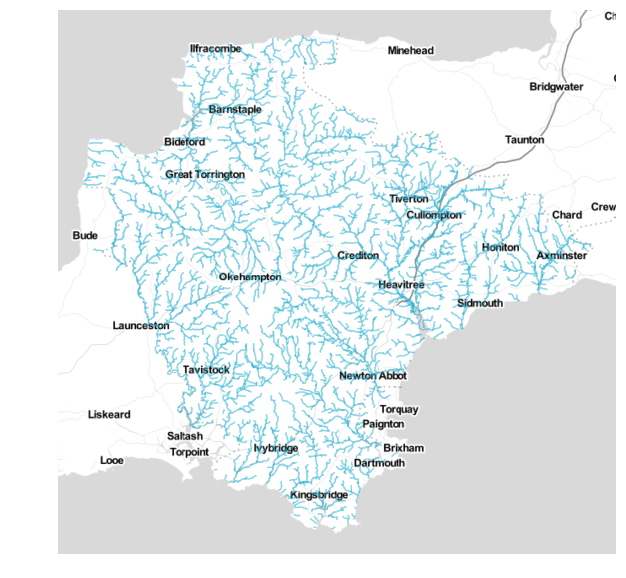

In [99]:
ax = devon_rivers.plot(figsize=(10, 10), alpha=0.5, edgecolor='#20AFCF')
add_basemap(ax, zoom=9, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()

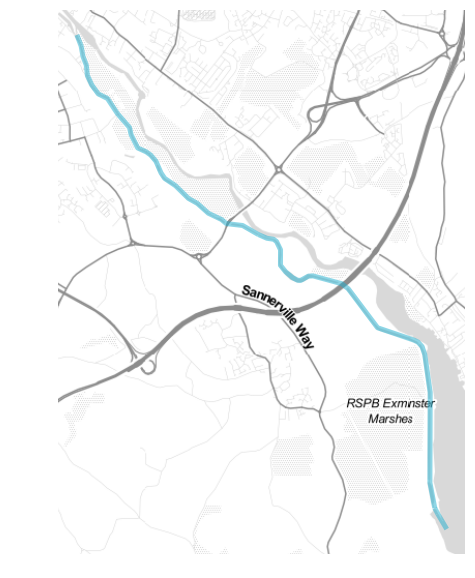

In [124]:
ax = devon_rivers[devon_rivers['name1'] == 'Exeter Canal'].plot(figsize=(10, 10), alpha=0.5, edgecolor='#20AFCF', linewidth=5)
add_basemap(ax, zoom=13, url=ctx.sources.ST_TONER_LITE)
ax.set_axis_off()